In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/home/hogar/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
rho_constan=4.9e-7 #Resistividad téorica del constantan
rho_cromo=1.1e-6 #Resistividad teórica de cromo-niquel

phi = 0.5e-3
alpha = 0.35e-3

In [27]:
'''Tablas de valores, las dos primeras columnas hacen referencia
a la fase 1(Directa) y la tercera y cuarta columna a la fase 2 (indirecta)'''

constan_1 = pd.DataFrame({'Longitud':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5], 
                      'Resistencia':[0.3,0.4,0.6,1.0,1.1,1.2,1.3,1.5,1.7,1.8],
                      'Voltaje':[0.058,0.052,0.08,0.106,0.119,0.138,0.16,0.184,0.217,0.222],
                      'Corriente':[0.165,0.163,0.163,0.163,0.163,0.163,0.163,0.162,0.161,0.162]})
constan_1

,Longitud,Resistencia,Voltaje,Corriente
0,0.05,0.3,0.058,0.165
1,0.10,0.4,0.052,0.163
2,0.15,0.6,0.080,0.163
3,0.20,1.0,0.106,0.163
4,0.25,1.1,0.119,0.163
5,0.30,1.2,0.138,0.163
6,0.35,1.3,0.160,0.163
7,0.40,1.5,0.184,0.162
8,0.45,1.7,0.217,0.161
9,0.50,1.8,0.222,0.162


In [28]:
cromo_1 = pd.DataFrame({'Longitud':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5], 
                      'Resistencia':[0.15,0.6,0.8,1.2,1.5,1.8,2.0,2.4,2.5,3.0],
                      'Voltaje':[0.064,0.1,0.147,0.206,0.247,0.292,0.332,0.38,0.427,0.455],
                      'Corriente':[1.165,1.163,0.162,1.162,1.161,0.161,0.159,0.159,0.158,0.158]})
cromo_1

,Longitud,Resistencia,Voltaje,Corriente
0,0.05,0.15,0.064,1.165
1,0.10,0.60,0.100,1.163
2,0.15,0.80,0.147,0.162
3,0.20,1.20,0.206,1.162
4,0.25,1.50,0.247,1.161
5,0.30,1.80,0.292,0.161
6,0.35,2.00,0.332,0.159
7,0.40,2.40,0.380,0.159
8,0.45,2.50,0.427,0.158
9,0.50,3.00,0.455,0.158


In [167]:
constan_2 = pd.DataFrame({'Longitud':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5], 
                      'Resistencia':[1.3,1.5,1.6,1.7,2.0,2.2,2.8,3.2,3.4,3.5],
                      'Voltaje':[0.9,0.311,0.310,0.230,0.243,0.265,0.3450,0.364,0.384,0.433],
                      'Corriente':[0.152,0.159,0.159,0.161,0.161,0.158,0.159,0.157,0.159,0.158]})
constan_2

,Longitud,Resistencia,Voltaje,Corriente
0,0.05,1.3,0.900,0.152
1,0.10,1.5,0.311,0.159
2,0.15,1.6,0.310,0.159
3,0.20,1.7,0.230,0.161
4,0.25,2.0,0.243,0.161
5,0.30,2.2,0.265,0.158
6,0.35,2.8,0.345,0.159
7,0.40,3.2,0.364,0.157
8,0.45,3.4,0.384,0.159
9,0.50,3.5,0.433,0.158


In [156]:
cromo_2 = pd.DataFrame({'Longitud':[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5], 
                      'Resistencia':[1,1.6,2.1,2.6,3.3,3.8,4.5,5.0,5.6,6.2],
                      'Voltaje':[0.11,0.198,0.314,0.387,0.487,0.56,0.650,0.73,0.810,0.892],
                      'Corriente':[0.163,0.162,0.161,0.159,0.158,0.157,0.156,0.154,0.153,0.152]})
cromo_2

,Longitud,Resistencia,Voltaje,Corriente
0,0.05,1.0,0.110,0.163
1,0.10,1.6,0.198,0.162
2,0.15,2.1,0.314,0.161
3,0.20,2.6,0.387,0.159
4,0.25,3.3,0.487,0.158
5,0.30,3.8,0.560,0.157
6,0.35,4.5,0.650,0.156
7,0.40,5.0,0.730,0.154
8,0.45,5.6,0.810,0.153
9,0.50,6.2,0.892,0.152


In [157]:
def calc_rho(rad,res,long): #Calculo de resistividad, teniendo ya la resistencia
    d = np.pi*(rad**2)*res / long
    return d

def R(volt,corr): #Cálculo de resistencia (fase indirecta)
    r = volt/corr
    return r


In [158]:
const1_rhos_dir = []
const1_rhos_ind = []

cromo1_rhos_dir=[]
cromo1_rhos_ind=[]

const2_rhos_dir = []
const2_rhos_ind = []

cromo2_rhos_dir=[]
cromo2_rhos_ind=[]


#Resistencias calculadas indirectamente
const1_res=[]
cromo1_res=[]
const2_res=[]
cromo2_res=[]

for i in range (0,10):
    
    #Fase 1 con Constantan 
    d1 = calc_rho(phi,constan_1.values[i:i+1,1], constan_1.values[i:i+1,0])
    r = R(constan_1.values[i:i+1,2],constan_1.values[i:i+1,3])
    const1_res.append(r)
    d2 = calc_rho(phi,r, constan_1.values[i:i+1,0])
    const1_rhos_dir.append(d1)
    const1_rhos_ind.append(d2)
    
    #Fase 2 con Cromo-Niquel
    d1 = calc_rho(phi,cromo_1.values[i:i+1,1], cromo_1.values[i:i+1,0])
    r = R(constan_1.values[i:i+1,2],constan_1.values[i:i+1,3])
    cromo1_res.append(r)
    d2 = calc_rho(phi,r, cromo_1.values[i:i+1,0])
    cromo1_rhos_dir.append(d1)
    cromo1_rhos_ind.append(d2)
    
    #Fase 1 con Constantan distinto radio
    d1 = calc_rho(alpha,constan_2.values[i:i+1,1], constan_2.values[i:i+1,0])
    r = R(constan_2.values[i:i+1,2],constan_2.values[i:i+1,3])
    const2_res.append(r)
    d2 = calc_rho(alpha,r, constan_2.values[i:i+1,0])
    const2_rhos_dir.append(d1)
    const2_rhos_ind.append(d2)
    
    #Fase 2 con Cromo-Niquel distinto radio
    d1 = calc_rho(alpha,cromo_2.values[i:i+1,1], cromo_2.values[i:i+1,0])
    r = R(cromo_2.values[i:i+1,2],cromo_2.values[i:i+1,3])
    cromo2_res.append(r)
    d2 = calc_rho(alpha,r,cromo_2.values[i:i+1,0])
    cromo2_rhos_dir.append(d1)
    cromo2_rhos_ind.append(d2)
    


## Gráficas de la Fase Directa

2.6751137444203997e-06 0.1533333333333332


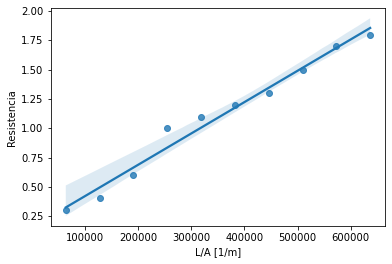

In [160]:
sns.regplot(x=constan_1.values[:,0]/(np.pi*((phi)**2)),y=constan_1.values[:,1], 
            data=constan_1, label="Regresión lineal")
slope, intercept = np.polyfit(constan_1.values[:,0]/(np.pi*((phi)**2)), constan_1.values[:,1], 1)
plt.xlabel('L/A [1/m]')
plt.ylabel('Resistencia')
print(slope, intercept)

4.245910071215297e-06 0.8333333333333331


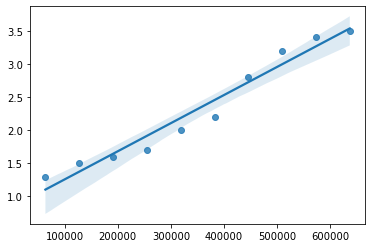

In [161]:
sns.regplot(x=constan_2.values[:,0]/(np.pi*((phi)**2)),y=constan_2.values[:,1], 
            data=constan_1, label="Regresión lineal")
slope, intercept = np.polyfit(constan_2.values[:,0]/(np.pi*((phi)**2)), constan_2.values[:,1], 1)
print(slope, intercept)

2.316067784026039e-06 -0.059999999999999894


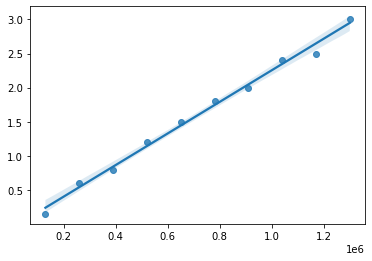

In [162]:
sns.regplot(x=cromo_1.values[:,0]/(np.pi*((alpha)**2)),y=cromo_1.values[:,1], 
            data=constan_1, label="Regresión lineal")
slope, intercept = np.polyfit(cromo_1.values[:,0]/(np.pi*((alpha)**2)), cromo_1.values[:,1], 1)
print(slope, intercept)

4.454873582567709e-06 0.386666666666667


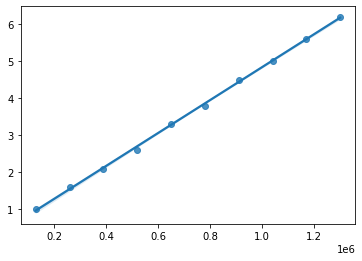

In [163]:
sns.regplot(x=cromo_2.values[:,0]/(np.pi*((alpha)**2)),y=cromo_2.values[:,1], 
            data=constan_1, label="Regresión lineal")
slope, intercept = np.polyfit(cromo_2.values[:,0]/(np.pi*((alpha)**2)), cromo_2.values[:,1], 1)
print(slope, intercept)

## Gráficas de la Fase Indirecta

[1.97128321e-06] [0.13216507]


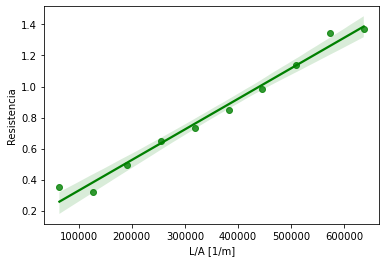

In [164]:
sns.regplot(x=constan_1.values[:,0]/(np.pi*((phi)**2)), y=const1_res, color='green')
slope, intercept = np.polyfit(constan_1.values[:,0]/(np.pi*((phi)**2)), const1_res, 1)
plt.xlabel('L/A [1/m]')
plt.ylabel('Resistencia')
print(slope, intercept)

[-2.01590604e-06] [3.11442108]


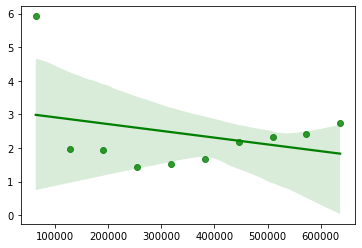

In [165]:
sns.regplot(x=constan_2.values[:,0]/(np.pi*((phi)**2)),y=const2_res, label="Regresión lineal", color='green')
slope, intercept = np.polyfit(constan_2.values[:,0]/(np.pi*((phi)**2)), const2_res, 1)
print(slope, intercept)

[9.65928772e-07] [0.13216507]


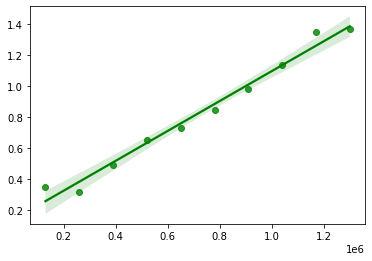

In [153]:
sns.regplot(x=cromo_1.values[:,0]/(np.pi*((alpha)**2)),y=cromo1_res, label="Regresión lineal", color='green')
slope, intercept = np.polyfit(cromo_1.values[:,0]/(np.pi*((alpha)**2)), cromo1_res, 1)
print(slope, intercept)

[4.42585381e-06] [0.13739984]


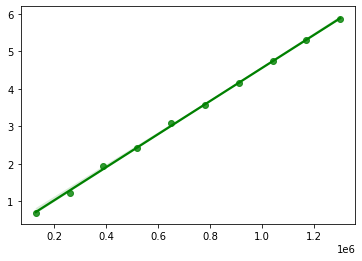

In [154]:
sns.regplot(x=cromo_2.values[:,0]/(np.pi*((alpha)**2)),y=cromo2_res, 
            data=constan_1, label="Regresión lineal", color='green')
slope, intercept = np.polyfit(cromo_2.values[:,0]/(np.pi*((alpha)**2)), cromo2_res, 1)
print(slope, intercept)

## Errores

In [181]:
def Delta_R(V,dV,I,dI): #Propagación de errores para el cálculo de R
    dR = (1/I)*dV + (V/(I**2))*dI
    return dR

def Delta_rho(r,dr,R,dR,L,dL): #Propagación de errores para rho, r es radio y R resistencia
    dD = ((1*np.pi*r*R)/L)*dr + (np.pi*(r**2)/L)*dR + ((np.pi*(r**2)*R)/(L**2))*dL
    return dD
    